## Data Prep:

1. Read in the data and apply your data prep function to it.

In [ ]:
import os
os.listdir('/content')

['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

income = pd.read_csv("income.csv")
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1),
        drop_first=True,
        dtype ='int'
    ).astype('int')
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
    splitting_df = pd.DataFrame({
                         "X_train":X_train.shape[0],
                         "X_test":X_test.shape[0],
                         "y_train":y_train.shape[0],
                         "y_test":y_test.shape[0]},
                         index =['Count'])
    return splitting_df.T

In [ ]:
#income = pd.read_csv("../Data/income.csv")
income_model_prep(income)

,Count
X_train,25582
X_test,6396
y_train,25582
y_test,6396


In [ ]:
income.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
data = pd.get_dummies(
    income.assign(
        target = np.where(income["SalStat"] == " less than or equal to 50,000", 0, 1),
        nativecountry = income["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
        occupation = income["occupation"].replace({" Armed-Forces": " ?"}),
        JobType = income["JobType"].replace({" Never-worked": " Without-pay"}),
    ).drop("SalStat", axis=1),
    drop_first=True,
    dtype ='int'
).astype('int')

In [ ]:
X = data.drop(["target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
splitted_df = pd.DataFrame({
    "X_train":X_train.shape[0],
    "X_test":X_test.shape[0],
    "y_train":y_train.shape[0],
    "y_test":y_test.shape[0]},
    index =['Count']
             )
splitted_df.T

,Count
X_train,25582
X_test,6396
y_train,25582
y_test,6396


## Assignment 1:

1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train[['age','hoursperweek']])
X_test_std = std.transform(X_test[['age','hoursperweek']])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std,y_train)

KNeighborsClassifier()

In [ ]:
#Accuracy score for training data
round(knn.score(X_train_std,y_train),2)

0.77

In [ ]:
#Accuracy score for the test data
knn.score(X_test_std,y_test)

0.75

In [ ]:
# Confusion matrix:
from sklearn.metrics import accuracy_score , confusion_matrix
y_pred = knn.predict(X_train_std)

In [ ]:
print(f"accuracy score of the training data: \n{round(accuracy_score(y_train, y_pred),2)}")
print(f"accuracy score of the test data: \n{accuracy_score(y_test, knn.predict(X_test_std))}")

accuracy score of the training data: 
0.77
accuracy score of the test data: 
0.75


In [ ]:
knn_confusion_matrix_train = confusion_matrix(y_train, y_pred)
knn_confusion_matrix_test =  confusion_matrix(y_test, knn.predict(X_test_std))
print(f"confusion matrix of training data: \n{knn_confusion_matrix_train}")
print(f"confusion matrix of test data: \n{knn_confusion_matrix_test}")

confusion matrix of training data: 
[[17790  1614]
 [ 4294  1884]]
confusion matrix of test data: 
[[4394  485]
 [1114  403]]


In [ ]:
#Heatmapping for the confusion matrix:
def HeatMap(training_matrix,test_matrix):
  from IPython import display
  display.set_matplotlib_formats('svg')
  fig , ax = plt.subplots(1,2,sharey = 'all', figsize = (12,5))

# Heat map for training
  sns.heatmap(training_matrix,
              ax = ax[0],
              cmap = "Greens",
              annot = True,
              fmt = "g",
              square = True,
              xticklabels = ["Predicted 0", "Predicted 1"],
              yticklabels = ["Actual 0", "Actual 1"])
  ax[0].set_title("KNN confusion Matrix-Train",fontsize=14, pad=15)
  ax[0].set_ylabel("Actual")
  ax[0].set_xlabel("Predicted")

  #Heatmap for test
  sns.heatmap(test_matrix,
            ax=ax[1],
            cmap = "Blues",
            annot = True,
            fmt = "g",
            square = True,
            xticklabels = ["Predicted 0", "Predicted 1"],
            yticklabels = ["Actual 0", "Actual 1"])
  ax[1].set_title("KNN Confusion Matrix - Test", fontsize=14, pad=15)
  ax[1].set_xlabel("Predicted")
 # ax[1].set_ylabel("Actual")

  sns.despine()
  plt.tight_layout()
  plt.show()

<ipython-input-56-9377cf39ee46>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


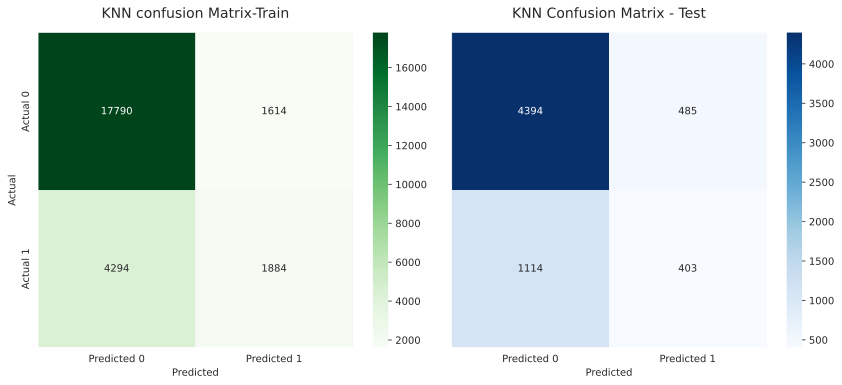

In [ ]:
HeatMap(knn_confusion_matrix_train ,knn_confusion_matrix_test )

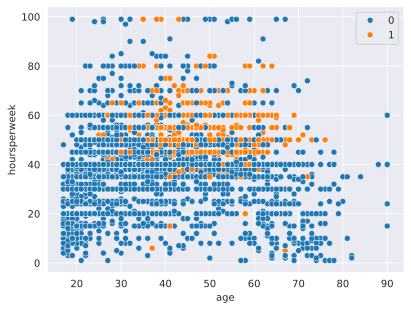

In [ ]:
sns.scatterplot(x = X_test['age'],
                y = X_test['hoursperweek'],
                hue = knn.predict(X_test_std)
                )
sns.despine()

## Assignment 2:

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_std , y_train)

KNeighborsClassifier()

In [ ]:
score_df = pd.DataFrame({"Train Accuracy": knn.score(X_train_std,y_train),
                         "Test Accuracy" : knn.score(X_test_std , y_test)
                         } , index = ['Score'])
score_df.T

,Score
Train Accuracy,0.876827
Test Accuracy,0.818793


In [ ]:
y_pred = knn.predict(X_train_std)
conf_mat = confusion_matrix(y_pred,y_train)
print(conf_mat)

[[18192  1939]
 [ 1212  4239]]


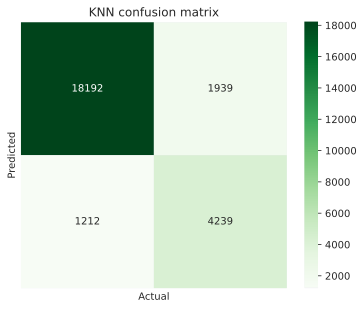

In [ ]:
sns.heatmap(conf_mat,
            cmap = 'Greens',
            annot = True,
            fmt = 'g',
            square = True,
            xticklabels = [],
            yticklabels = []
            ).set(
                xlabel = 'Actual',
                ylabel = 'Predicted',
                title = 'KNN confusion matrix'
            );

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}

gridsearch = GridSearchCV(estimator=KNeighborsClassifier(),
                          param_grid= parameters)
gridsearch.fit(X_train_std , y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 15}

In [ ]:
k = 15
knn = KNeighborsClassifier()
knn.fit(X_train_std , y_train)

print(f"accuracy train score: {accuracy_score(y_train , knn.predict(X_train_std))}")
print(f"accuracy test score: {accuracy_score(y_test , knn.predict(X_test_std))}")

accuracy train score: 0.8768274568055664
accuracy test score: 0.8187929956222639
